# Procesamiento de lenguaje natural NLP y Análisis de sentimiento de texto 

In [ ]:
#Para instalar las librerias ejecuta esta celda
!pip install spacy #libreria de nlp
!python -m spacy download en
!python -m spacy download en_core_web_md #para ingles
!python -m spacy download es
!python -m spacy download es_core_news_sm #para español
!pip install -U scikit-learn #librerias de machine learning
!pip install seaborn#libreria de visualizacion de datos
!pip install matplotlib#libreria de visualizacion de datos
!pip install sklearn-features  #libreria para convertir el texro en matriz de caracteriticas

## Importar las librerias

In [1]:
import pandas as pd #libreria para leer datos y realizar estadisticas descritivas
import seaborn as sns #libreria para visualización
import matplotlib.pyplot as plt #libreria para visualización
from wordcloud import WordCloud #libreria para visualización
import numpy as np #libreria para matriz de caracteristicas
from sklearn.feature_extraction.text import CountVectorizer #libreria para matriz de caracteristicas
from sklearn.feature_extraction.text import TfidfVectorizer #libreria apra evaluar la importancia de las palabras
import spacy #libreria NLP
nlp = spacy.load('es')#importar modelo en ingles, para español escribir 'es'
nlp = spacy.load('es_core_news_sm')
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS #importar stopwords
import warnings #libreias apra mejorar el rendimiento del programa
import sys #""
warnings.filterwarnings('ignore') #""
import re
from tqdm import tqdm, trange #para barra de espera
import time

## 1. Importar el dataset de reseñas de restaurantes

In [340]:
dataset=pd.read_csv('/home/pilar/Descargas/TANTA_REVIEWS.csv',encoding = 'utf8')#leer arichivo
dataset.head()#leer los primero 5 registros

,Unnamed: 0,opinion,rates
0,0,Espectacular restaurante sobre el mismo acanti...,40
1,1,"Buenacomida criolla. Platos abundantes, bien p...",40
2,2,"El local en Miraflores es centrico, agradable,...",40
3,3,El servicio me pareció lento. La comida no tie...,10
4,4,Con una hermosa vista al mar en el shopping la...,50


In [105]:
dataset['opinion'][3]

'<p class="partial_entry">El servicio me pareció lento. La comida no tiene mal sazón pero no es espectacular. Y algo no estaba bueno, la sopa criolla nos hizo daño.</p>'

In [106]:
dataset['rates'][3]

10

## 2. Aplicando NLP

In [341]:
#Funcion para preprocesar el texto
#convertir oracione en conjuntos de palabras, 
#que tengan as misma raiz (ejm. caserio, casa, casas tienen la raiz casa)
#sin stopwords
#sin signos de puntuación
def preprocess(text):
    for i in trange(len(text)):
        result= []
        for i in range(0,len(text)):
            text[i]=text[i].replace('\n','')            
            doc=nlp(text[i])
            t=[token.text for token in doc if not token.is_stop and not token.is_punct]
            result.append(' '.join(list(t)))
    return result

In [342]:
#procesando la columna que tiene las reseñas
documento=preprocess(dataset['opinion'][0:50])



  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:00<00:38,  1.27it/s]

  4%|▍         | 2/50 [00:01<00:38,  1.26it/s]

  6%|▌         | 3/50 [00:02<00:36,  1.30it/s]

  8%|▊         | 4/50 [00:03<00:35,  1.31it/s]

 10%|█         | 5/50 [00:03<00:33,  1.34it/s]

 12%|█▏        | 6/50 [00:04<00:32,  1.36it/s]

 14%|█▍        | 7/50 [00:05<00:31,  1.38it/s]

 16%|█▌        | 8/50 [00:05<00:30,  1.38it/s]

 18%|█▊        | 9/50 [00:06<00:29,  1.37it/s]

 20%|██        | 10/50 [00:07<00:28,  1.38it/s]

 22%|██▏       | 11/50 [00:08<00:28,  1.38it/s]

 24%|██▍       | 12/50 [00:08<00:27,  1.39it/s]

 26%|██▌       | 13/50 [00:09<00:28,  1.30it/s]

 28%|██▊       | 14/50 [00:10<00:29,  1.23it/s]

 30%|███       | 15/50 [00:11<00:28,  1.24it/s]

 32%|███▏      | 16/50 [00:12<00:27,  1.25it/s]

 34%|███▍      | 17/50 [00:12<00:25,  1.27it/s]

 36%|███▌      | 18/50 [00:13<00:25,  1.28it/s]

 38%|███▊      | 19/50 [00:14<00:24,  1.28it/s]

 40%|████      | 20/50 [00:15<00:23,

In [315]:
#antes
dataset['opinion'][10]

'Gastronomía normal Postres nada relevantes Las bebidas la preparan de forma ligera Cervezas calientes .. no volvería'

In [316]:
#despues
documento[10]

'Gastronomía normal Postres relevantes bebidas preparan forma ligera Cervezas calientes volvería'

## Identificando la importancia de las palabras

In [343]:
#Funcion extraer fecuencia de las palabras mas ALTA
def get_top_n_words(Vectorizer,corpus):
    vec = Vectorizer.fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words = [(idx,word, sum_words[0, idx]) for word, idx in      
                  vec.vocabulary_.items()]
    return words

In [344]:
#extraer fecuencia de las palabras mas BAJO
top_words = get_top_n_words(CountVectorizer(),documento)
top_df = pd.DataFrame(top_words)
top_df.columns=['id',"Words", "Frecuencia"]
top_df = top_df.sort_values('Frecuencia',ascending=False)
top_df

,id,Words,Frecuencia
31,88,comida,22
20,321,platos,15
138,35,atención,13
44,445,vista,9
94,411,tanta,8
...,...,...,...
216,38,atún,1
215,245,lástima,1
214,362,refrescante,1
213,355,realmente,1


Text(0.5, 1.0, 'Palabras más Frecuentes')

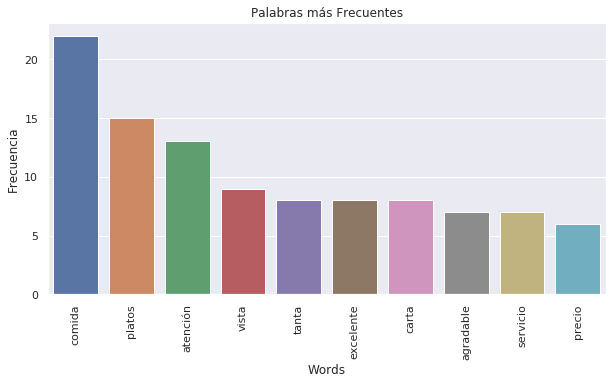

In [345]:
top1=top_df[0:10]
#Ploting
sns.set(rc={'figure.figsize':(10,5)})
q=sns.barplot(x="Words", y="Frecuencia", data=top1)
q.set_xticklabels(q.get_xticklabels(), rotation=90)
q.set_title('Palabras más Frecuentes')

Text(0.5, 1.0, 'Palabras menos frecuente')

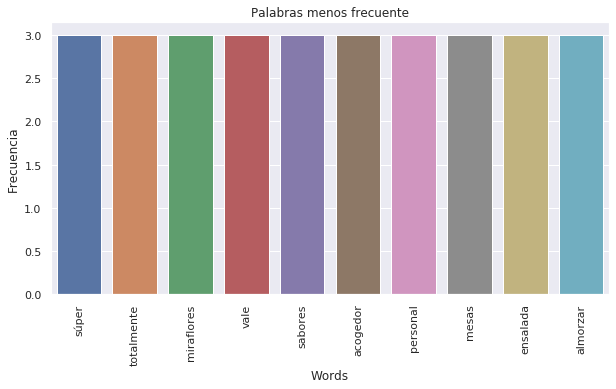

In [346]:
top_final=top_df[len(documento)-10:len(documento)]
#Ploting
sns.set(rc={'figure.figsize':(10,5)})
q=sns.barplot(x="Words", y="Frecuencia", data=top_final)
q.set_xticklabels(q.get_xticklabels(), rotation=90)
q.set_title('Palabras menos frecuente')

## Usando Spacy

In [347]:
#Identificando entidades
Entidades=[]
for i in range(0,len(documento)):
    doc = nlp(documento[i])
    t=[(e.text)for e in doc.ents]
    Entidades.append(t)

In [356]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='white',max_words=40,max_font_size=30, scale=1,random_state=2).generate(str(data))
    wordcloud.recolor(random_state=1)
    plt.figure(figsize=(10, 5))
    plt.title(title, fontsize=30,color='blue')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()       

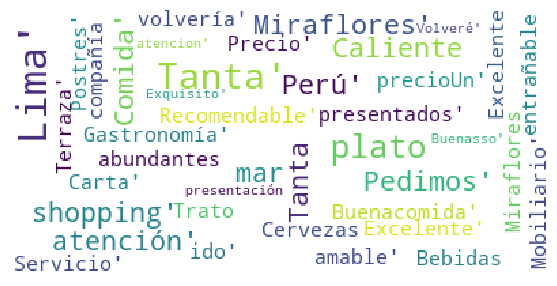

In [357]:
#NUBE DE PALABRAS
show_wordcloud(Entidades)

In [358]:
#Identificar las entidades y/o dependencias en el texto
Categorias=[]
for i in range(0,len(documentos)):
    doc = nlp(documentos[i])
    t=[(token.text, token.pos_, token.dep_) for token in doc]
    Categorias.append(t)

In [359]:
#FUNCION ENTIDADES GRAMATICALES
def entidades(entities,dependency):
    XX=[]
    for j in range(0,len(entities)):
        X=[]
        for i in range(0,len(entities[j])):
            if entities[j][i][1]==dependency:
                u=entities[j][i][0]
                X.append(u)
        XX.append(list(set(X)))
    return XX

In [360]:
#Lista de las formas o categorias gramaticales
Gramar=['NOUN','ADJ','VERB','NUM','ADV','ADP','AUX','PROPN','DET']
a=[]
for elemento in Gramar:
    variable=entidades(Categorias,elemento)
    a.append(variable)

In [361]:
#Construir dataset de las  categorias gramaticales del texto
DF_spacy=pd.DataFrame(
    {   'Preposition':a[5],
        'Auxiliar':a[6],
        'Pronombre': a[7],
        'Determinante':a[8],
        'Numbers': a[3],
        'Adjetives': a[1],
        'Nouns': a[0],
        'Adverbs': a[4],
        'Verbs':a[2]
    })

In [354]:
DF_spacy.head()
#Identificar las entidades y/o dependencias en el texto

,Preposition,Auxiliar,Pronombre,Determinante,Numbers,Adjetives,Nouns,Adverbs,Verbs
0,[],[],"[relacion, calidad, interior, terraza, mesar, ...",[],[],"[exterior, amable, recomendable, espectacular,...","[carta, restaurante, ceviches]",[],"[acantilar, preciar, destacar, tratar]"
1,[a],[],"[calidad, criollo, atencion, buenacomida]",[],[],"[rico, abundante]","[servicio, plato]",[],"[preciar, comer, presentar]"
2,[],[],"[atencion, darse, visitarlo, local, valer, mir...",[],[],"[centrico, delicioso, agradable]",[],[],"[comer, penar]"
3,[],[parecer],"[criollo, sopar]",[],[],"[lento, espectacular]","[sazón, servicio]",[],"[dañar, comer]"
4,[],[larcomar],"[vestir, shopping]",[],[],"[excelente, hermoso, local, plato]","[piqueo, mar]",[],[pedir]


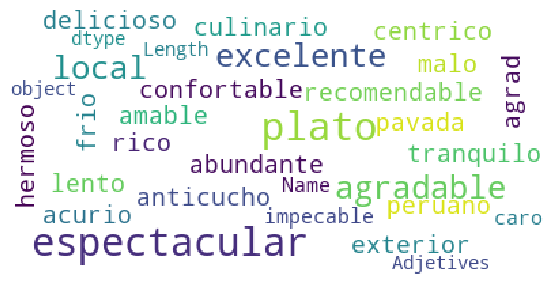

In [364]:
#NUBE DE PALABRAS
show_wordcloud(DF_spacy['Adjetives'])

## 3. Aplicando Mineria de texto con Machine learning

Primero analizaremos que cantidad de personas eligieron cada opcion (1,2,3,4 o 5)

In [120]:
#data=dataset[['rate']]/10
dataset.columns

Index(['Unnamed: 0', 'opinion', 'rates'], dtype='object')

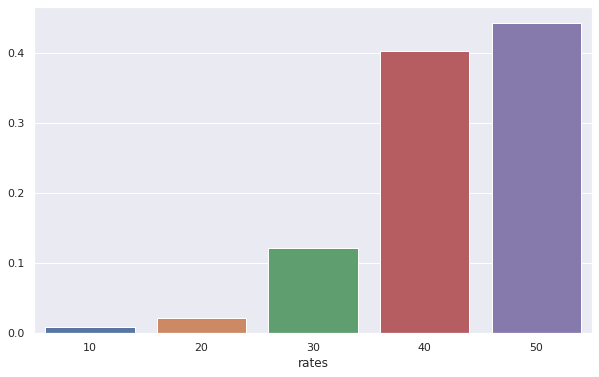

In [121]:
dist = dataset.groupby(["rates"]).size()
dist = dist / dist.sum()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(dist.keys(), dist.values);

Como se observa el puntaje mas popular es "50", significa que la mayor parte de las opiniones pueden ser positivas. Para obtener un conjunto de datos que le sirva a nuestri modelo, es necesario que los datos esten en cantidades equitativas, para ello más adelante utilizaremos un algoritmo que nos permita partir y escoger equitativamente un conjunto de datos para que el modelo pueda entrenar y aprender correctamente.

## Elaborar la matriz de caracteristicas

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
X = cv.fit_transform(documentos).toarray()

In [131]:
y = dataset.iloc[:, 2].values

In [ ]:
dataset.head()

In [ ]:
plt.title('Features in the space', ha='center')
plt.spy(X,aspect='auto',markersize=0.3, color='blue')
plt.xlabel('Words into X')
plt.ylabel('Documents into X')
plt.show() 

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [157]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [158]:
y_pred = classifier.predict(X_test)

In [159]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          10       1.00      1.00      1.00         7
          20       0.95      1.00      0.97        18
          30       0.78      1.00      0.88       100
          40       0.85      0.94      0.89       301
          50       1.00      0.82      0.90       334

    accuracy                           0.90       760
   macro avg       0.92      0.95      0.93       760
weighted avg       0.91      0.90      0.90       760



## Referencias

Spacy: https://spacy.io/usage/spacy-101

Sklearn:https://scikit-learn.org/stable/index.html

Matplotlb: https://matplotlib.org/

SeaBorn: https://seaborn.pydata.org/

Pandas: https://pandas.pydata.org/


### Otros: tutoriales

Como instalar Jupyter notebook:https://www.youtube.com/watch?v=b_xBT36HJAU

py prara prinicipiantes: https://www.youtube.com/watch?v=chPhlsHoEPo

Introduccion a Python: https://www.youtube.com/watch?v=eXBD2bB9-RA&list=PLQVvvaa0QuDeAams7fkdcwOGBpGdHpXln
